In [1]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.1.0


In [0]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [0]:
# data loading
data = tf.keras.datasets.cifar10
(x_train, y_train),(x_test, y_test) = data.load_data()

In [0]:
# normalization
x_train = x_train / 255
x_test = x_test / 255


In [38]:
# flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()
y_train.shape

(50000,)

In [0]:
# number of labels
K = len(set(y_train))

In [0]:
# build the model
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(K, activation='softmax')(x)

In [0]:
# compile the model
model = Model(i, x)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [0]:
# create a generator for data augmentation
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

In [44]:
# train the model
r = model.fit_generator(
    train_generator,
    validation_data=(x_test, y_test),
    steps_per_epoch=steps_per_epoch,
    epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.7043 - accuracy: 0.4289 - val_loss: 1.3049 - val_accuracy: 0.5335
Epoch 2/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.3988 - accuracy: 0.5029 - val_loss: 1.5036 - val_accuracy: 0.4946
Epoch 3/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.3198 - accuracy: 0.5344 - val_loss: 1.2263 - val_accuracy: 0.5552
Epoch 4/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2670 - accuracy: 0.5534 - val_loss: 1.0863 - val_accuracy: 0.6164
Epoch 5/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.2139 - accuracy: 0.5711 - val_loss: 1.1996 - val_accuracy: 0.5859
Epoch 6/50
1562/1562 [==============================] - 31s 20ms/step - loss: 1.1706 - accuracy: 0.5890 - val_loss: 1.063

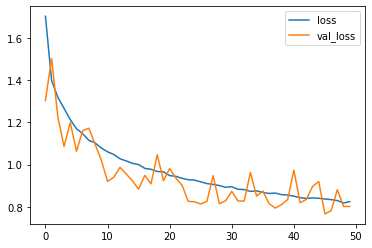

In [45]:
# plot loss history
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

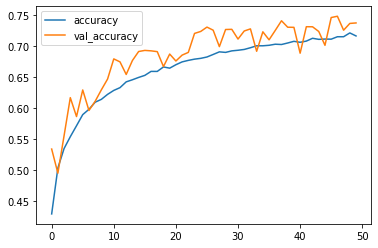

In [46]:
# plot accuracy
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[776  23  47  19  11   2  12  16  44  50]
 [  8 893   2   6   3   2  11   2  10  63]
 [ 59   4 624  55  54  28 119  36   8  13]
 [ 22  14  58 562  60  72 124  49   9  30]
 [ 19   3  73  51 614  12 116 101   7   4]
 [ 18   9  64 246  40 449  71  85   6  12]
 [  5   2  22  33  11   5 907   9   2   4]
 [ 10   5  17  34  16  22  16 866   2  12]
 [ 60  37  14  14   6   0   7   7 811  44]
 [ 25  68   2   6   3   2   8  11   8 867]]


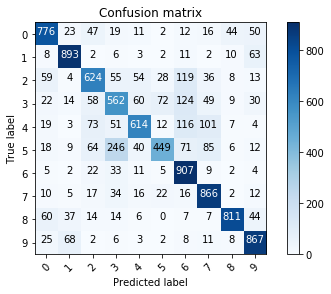

In [47]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

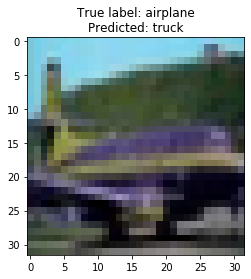

In [50]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s\nPredicted: %s" % (labels[y_test[i]], labels[p_test[i]]));